collect data

In [41]:
import pandas as pd
df=pd.read_csv("house_price.csv")
df.head()

,Square_Feet,Bedrooms,Distance_to_CityCenter_km,Price
0,1811.258321,4,15.368111,233439.205911
1,3366.928627,3,12.204118,522596.044817
2,2776.383643,5,14.053609,423116.565229
3,2416.377907,1,7.581976,363490.279518
4,1221.250329,5,26.792337,179014.181626


In [42]:
df.isnull().sum()

Square_Feet                  0
Bedrooms                     0
Distance_to_CityCenter_km    0
Price                        0
dtype: int64

visualize data

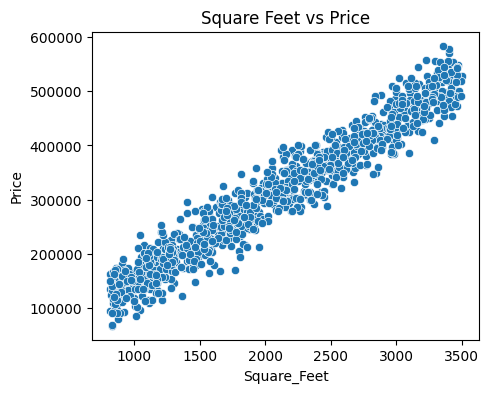

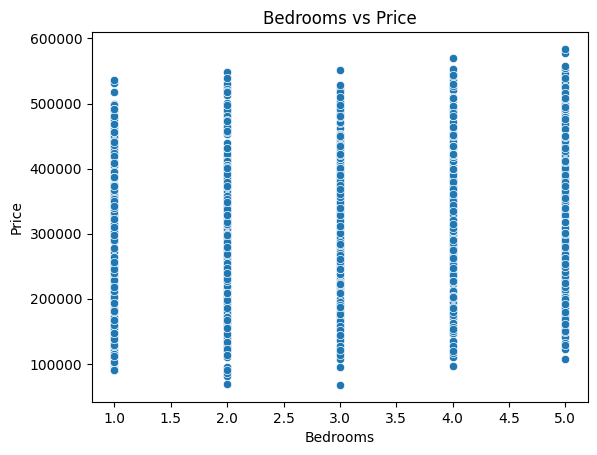

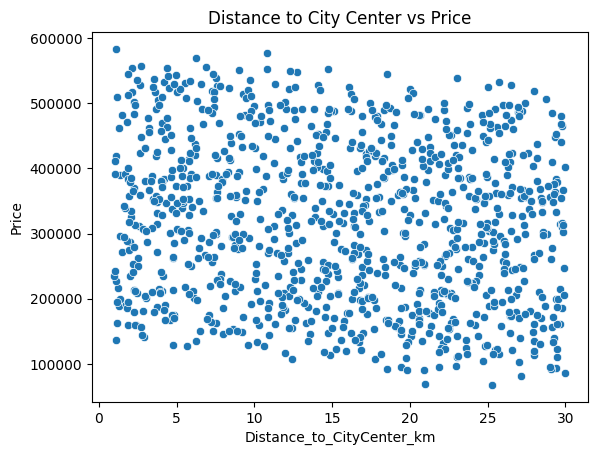

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.scatterplot(x='Square_Feet', y='Price', data=df)
plt.title('Square Feet vs Price')
plt.show()

sns.scatterplot(x='Bedrooms', y='Price', data=df)
plt.title('Bedrooms vs Price')
plt.show()

sns.scatterplot(x='Distance_to_CityCenter_km', y='Price', data=df)
plt.title('Distance to City Center vs Price')
plt.show()

see correlation

In [44]:
df.corr()

,Square_Feet,Bedrooms,Distance_to_CityCenter_km,Price
Square_Feet,1.000000,-0.026014,-0.003876,0.968212
Bedrooms,-0.026014,1.000000,-0.008988,0.093881
Distance_to_CityCenter_km,-0.003876,-0.008988,1.000000,-0.149816
Price,0.968212,0.093881,-0.149816,1.000000


*here we can see the square_feet is highly correlated and another are very low correleted

split data

In [45]:
x = df.drop('Price', axis=1)
y = df['Price']

In [46]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=42)

stander scale

In [47]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
x_train_sc=scaller.fit_transform(x_train)
x_test_sc=scaller.transform(x_test)

In [48]:

x_train_sc

array([[ 0.37785279, -0.03819614,  0.72988197],
       [-1.40195769, -0.03819614, -1.59946987],
       [-0.13981439, -0.03819614, -0.21662143],
       ...,
       [ 0.95601291, -0.74180933,  1.70359695],
       [ 0.70147507,  0.66541704, -0.20069724],
       [-0.61839719,  0.66541704,  0.17418603]], shape=(700, 3))

create object

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_sc, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


see coefficient

In [50]:
print(model.coef_)

[118619.6889358   14661.71008513 -17288.71079003]


*here the Square_feet most effective

predict data 

In [51]:
y_pred = model.predict(x_test_sc)

evaluation

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 423659372.228561
R^2 Score: 0.9715365515978116


linear regression for every feature

In [53]:
import pandas as pd
import sklearn.metrics as mt
import sklearn.model_selection as md
import sklearn.linear_model as ln

df=pd.read_csv("house_price.csv")
#x=df[['Distance_to_CityCenter_km']]
#x=df[['Bedrooms']]
x=df[['Square_Feet']]
y=df['Price']
x_train,x_test,y_train,y_test=md.train_test_split(x,y,test_size=0.3)
model=ln.LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mt.mean_squared_error(y_test,y_pred)
r2=mt.r2_score(y_test,y_pred)
print(mse,r2)


959287401.9022027 0.9339636567666928
